In [2]:
import os
import shutil

# Paths
source_directory = "/kaggle/input/training-e"  
destination_directory = "/kaggle/working/synthetic_seismic_mxe" 

# Ensure destination directory exists
os.makedirs(destination_directory, exist_ok=True)

# Iterate over each folder in the source directory
for folder_name in os.listdir(source_directory):
    folder_path = os.path.join(source_directory, folder_name)

    # Skip if not a folder
    if not os.path.isdir(folder_path):
        continue

    # Find the file containing 'MXE' in its name
    for file_name in os.listdir(folder_path):
        if "MXE" in file_name: 
            file_to_copy_path = os.path.join(folder_path, file_name)
            shutil.copy(file_to_copy_path, os.path.join(destination_directory, f"{folder_name}_{file_name}"))
            print(f"Copied: {file_to_copy_path}")
            break  # Copy only one file per folder

print("File copying completed.")

Copied: /kaggle/input/training-e/response_158/XB.ELYSE.SE.MXE.sac
Copied: /kaggle/input/training-e/response_218/XB.ELYSE.SE.MXE.sac
Copied: /kaggle/input/training-e/response_75/XB.ELYSE.SE.MXE.sac
Copied: /kaggle/input/training-e/response_217/XB.ELYSE.SE.MXE.sac
Copied: /kaggle/input/training-e/response_131/XB.ELYSE.SE.MXE.sac
Copied: /kaggle/input/training-e/response_110/XB.ELYSE.SE.MXE.sac
Copied: /kaggle/input/training-e/response_194/XB.ELYSE.SE.MXE.sac
Copied: /kaggle/input/training-e/response_298/XB.ELYSE.SE.MXE.sac
Copied: /kaggle/input/training-e/response_200/XB.ELYSE.SE.MXE.sac
Copied: /kaggle/input/training-e/response_297/XB.ELYSE.SE.MXE.sac
Copied: /kaggle/input/training-e/response_50/XB.ELYSE.SE.MXE.sac
Copied: /kaggle/input/training-e/response_52/XB.ELYSE.SE.MXE.sac
Copied: /kaggle/input/training-e/response_276/XB.ELYSE.SE.MXE.sac
Copied: /kaggle/input/training-e/response_145/XB.ELYSE.SE.MXE.sac
Copied: /kaggle/input/training-e/response_267/XB.ELYSE.SE.MXE.sac
Copied: /kagg

In [3]:
!pip install obspy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 76.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.7 MB/s eta 0:00:00:00:01
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.54 which is incompatible.


In [4]:
import os
from obspy import read
import numpy as np

arrays = []
mean_array = []

base_dir = '/kaggle/working/synthetic_seismic_mxe'

for file_name in os.listdir(base_dir):
    file_path = os.path.join(base_dir, file_name)
    if os.path.isfile(file_path):  # Ensure it's a file
        st = read(file_path, debug_headers=True)
        arrays.append(st[0].data)
        mean_array.append(np.mean(st[0].data))

np.random.seed(40)
for i in range(5):
    mean_array.append(np.random.uniform(-6e-05,1e-05))

print(len(mean_array))
print(np.min(mean_array))
print(np.max(mean_array))

305
-6.959604797884822e-05
1.616075314814225e-05


(300, 7)


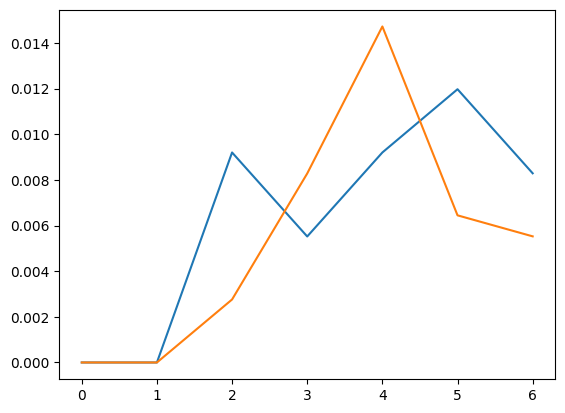

In [5]:
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq
dominant_frequencies = np.empty((0,7))

base_dir = '/kaggle/working/synthetic_seismic_mxe'

sampling_rate = 1.0
def dominant_frequency(signal, sampling_rate):
    N = len(signal)
    yf = np.abs(fft(signal)[:N // 2])  # Positive frequency components
    xf = fftfreq(N, 1 / sampling_rate)[:N // 2]
    
    # Avoid signals with zero data or invalid entries
    if len(xf) > 0:
        dominant_freq = xf[np.argmax(yf)]
    else:
        dominant_freq = 0
    return dominant_freq

for file_name in os.listdir(base_dir):
    file_path = os.path.join(base_dir, file_name)
    if os.path.isfile(file_path):  # Ensure it's a file
        st = read(file_path, debug_headers=True)
        data = st[0].data
        num_segments = 7
        segments = np.array_split(data, num_segments)
        dominant_frequencies_row = [dominant_frequency(segment, sampling_rate) for segment in segments]
        dominant_frequencies = np.append(dominant_frequencies,[dominant_frequencies_row],axis=0)

print(dominant_frequencies.shape)
plt.plot(dominant_frequencies[0])
plt.plot(dominant_frequencies[1])

In [6]:
arrays=np.array(arrays)
mean_array=np.array(mean_array)
arrays.shape
#arrays still does not have noise

(300, 7607)

In [7]:
fft_magnitudes=[]
for array in arrays:
    fft_magnitudes.append(np.max(np.abs(np.fft.fft(array))))
print(len(fft_magnitudes))

300


In [8]:
for i, array in enumerate(arrays[:10]):
    print(f"Array {i}: {array}")


Array 0: [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.1902349e-06 3.6783192e-06
 3.0017716e-06]
Array 1: [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.4976565e-06
 -4.6977279e-06 -5.7952248e-06]
Array 2: [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.5983905e-06
 -4.8289012e-06 -5.7658672e-06]
Array 3: [0.000000e+00 0.000000e+00 0.000000e+00 ... 9.324210e-06 9.092961e-06
 8.917401e-06]
Array 4: [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.5329746e-06 9.9481360e-07
 4.9893197e-07]
Array 5: [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.5863355e-06
 -3.0788592e-06 -4.4602921e-06]
Array 6: [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.1098531e-05
 -2.0185782e-05 -1.8899107e-05]
Array 7: [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.3980327e-06 3.5575965e-06
 3.6423962e-06]
Array 8: [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.0222210e-06 2.2584290e-06
 2.4354592e-06]
Array 9: [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -7.5451845e-07
 -1.1353

In [9]:
np.random.seed(41)
for i in range(5):
    fft_magnitudes.append(np.random.uniform(0,0.3))
fft_magnitudes=np.array(fft_magnitudes)
fft_magnitudes.shape

(305,)

In [10]:
fft_magnitudes
print(np.min(fft_magnitudes))
print(np.max(fft_magnitudes))

0.0017394504975527525
0.5294171571731567


In [11]:
print(len(mean_array))
print(mean_array)
print(len(fft_magnitudes))
print(fft_magnitudes)

305
[-4.05544142e-07 -1.92877778e-07 -4.52104985e-07 -3.36366980e-07
 -1.66478049e-08 -1.12021965e-07 -4.08087516e-07  2.48171744e-07
  2.21941377e-07 -1.98023287e-07 -9.32541388e-06 -1.93090159e-07
  1.35110056e-07  4.74589399e-07  4.72072173e-07 -2.99638231e-07
 -3.79640966e-07 -2.27157528e-07 -2.50654807e-07 -3.43415621e-07
 -5.46225749e-07 -3.33867888e-07  1.82811249e-07  7.82887781e-08
 -2.24587183e-07  2.91224893e-07 -2.46434183e-07 -5.61343825e-07
  3.76422975e-07  2.61908070e-07  3.78279054e-07  7.32331102e-07
  2.71195404e-07 -3.51355624e-07 -2.27244854e-07 -1.95046397e-07
  2.81590843e-07 -2.48164127e-07 -1.77646837e-06 -3.91082125e-07
 -5.56018627e-08  1.95605736e-07  2.65136720e-07  7.91372656e-08
  9.00315058e-08 -4.37716153e-07  1.23243311e-07 -3.57272285e-07
 -2.01304914e-07  6.54343808e-07  8.70722999e-07 -3.53344291e-07
 -8.97239829e-08  1.97434602e-07 -3.25169754e-06 -3.12094386e-07
 -3.38212971e-07 -3.65315600e-07  1.87583552e-07  1.31301761e-07
 -8.29587350e-08  1.0

In [12]:
new_rows = np.random.random((5, 7))

# Append the new rows to the existing array
dominant_frequencies_anomaly = np.vstack((dominant_frequencies, new_rows))
print(dominant_frequencies_anomaly.shape)

(305, 7)


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from scipy.fft import fft

In [14]:
# Extract each column into individual arrays
individual_arrays = [dominant_frequencies_anomaly[:, i] for i in range(7)]
print(dominant_frequencies_anomaly)
# Example: Access array1 (the first extracted column)
array1 = individual_arrays[0]
print("Array1 shape:", array1.shape)
print(individual_arrays[1])

[[0.         0.         0.00919963 ... 0.00919963 0.01197053 0.00828729]
 [0.         0.         0.00275989 ... 0.01471941 0.00644567 0.00552486]
 [0.13707452 0.         0.00551978 ... 0.01379945 0.00460405 0.00460405]
 ...
 [0.3982128  0.60822646 0.72845649 ... 0.39390821 0.23222257 0.4416646 ]
 [0.37302139 0.58360604 0.10003138 ... 0.08319793 0.12622394 0.32289153]
 [0.64292729 0.99947173 0.28100165 ... 0.87260106 0.78933922 0.21808769]]
Array1 shape: (305,)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.85188592e-02
 0.00000000e+00 0.00000000e+00 1.19595216e-02 3.31186753e-02
 0.00000000e+00 2.75988960e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.75988960e-02 0.00000000e+00 1.01195952e-02
 9.19963201e-04 2.75988960e-02 0.00000000e+00 9.19963201e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.27966881e-03 0.00000000e+00 6.43974241e-03 6.43974241e-03
 6.43974241e-03 0.00000000e+00 5.51977921e-03 7.35970561e-03
 5.51977921e-03 9.19963201e-04 8.18767249e-02 9

In [15]:
# Combine features into a single array
features = np.column_stack((mean_array, fft_magnitudes, individual_arrays[0], individual_arrays[1], individual_arrays[2], individual_arrays[3], individual_arrays[4], individual_arrays[5], individual_arrays[6]))

# Normalize the features for clustering
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
print(features_scaled.shape)
print(features)

(305, 9)
[[-4.05544142e-07  2.64251065e-02  0.00000000e+00 ...  9.19963201e-03
   1.19705341e-02  8.28729282e-03]
 [-1.92877778e-07  2.06483994e-02  0.00000000e+00 ...  1.47194112e-02
   6.44567219e-03  5.52486188e-03]
 [-4.52104985e-07  1.81029867e-02  1.37074517e-01 ...  1.37994480e-02
   4.60405157e-03  4.60405157e-03]
 ...
 [-4.80255858e-06  2.03044872e-01  3.98212796e-01 ...  3.93908213e-01
   2.32222574e-01  4.41664604e-01]
 [-3.98886371e-05  1.30408457e-02  3.73021395e-01 ...  8.31979314e-02
   1.26223945e-01  3.22891530e-01]
 [-2.84754589e-05  3.49271109e-02  6.42927292e-01 ...  8.72601060e-01
   7.89339219e-01  2.18087694e-01]]


In [16]:
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(features_scaled)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [17]:
print(wcss)

[2744.999999999999, 1158.243273104817, 776.3826554046918, 587.2777980090746, 403.2559039792834, 262.93554054163644, 164.6097790462737, 107.33456465928306, 80.8591674066744, 61.98382504157087]


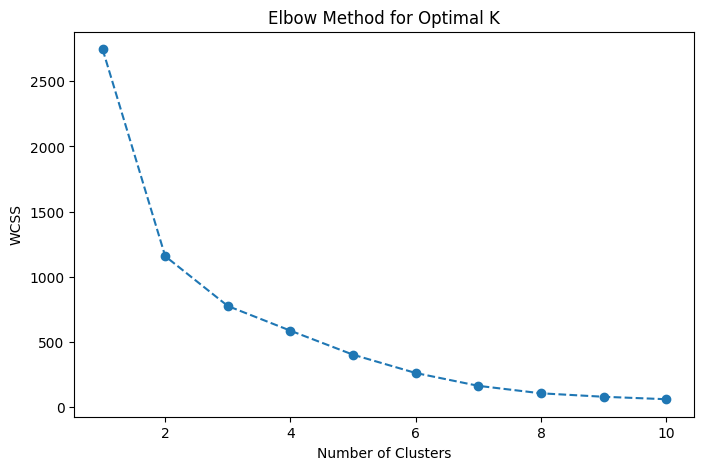

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
!pip install kneed

In [20]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1]


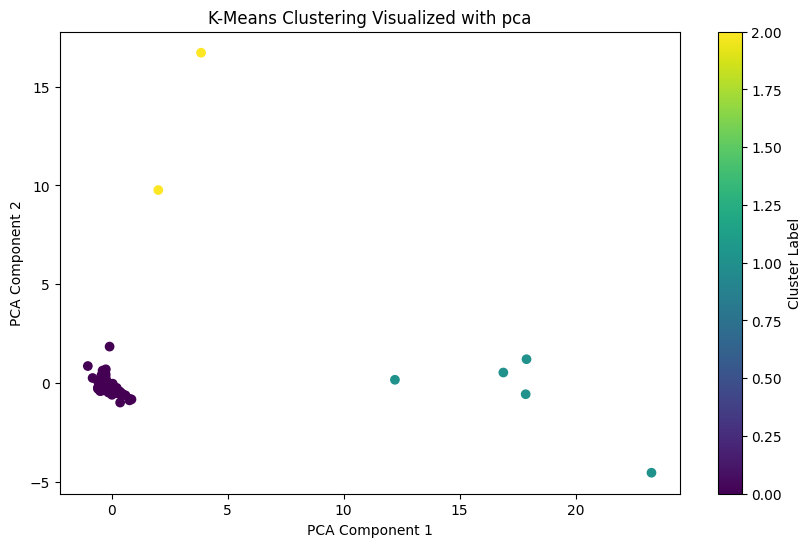

In [21]:
# K MEANS
kmeans = KMeans(n_clusters=kl.elbow, random_state=42)
clusters = kmeans.fit_predict(features_scaled)
print(clusters)

from sklearn.decomposition import PCA
# Apply pca for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Plot the clustering result in 2D space
plt.figure(figsize=(10, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('K-Means Clustering Visualized with pca')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

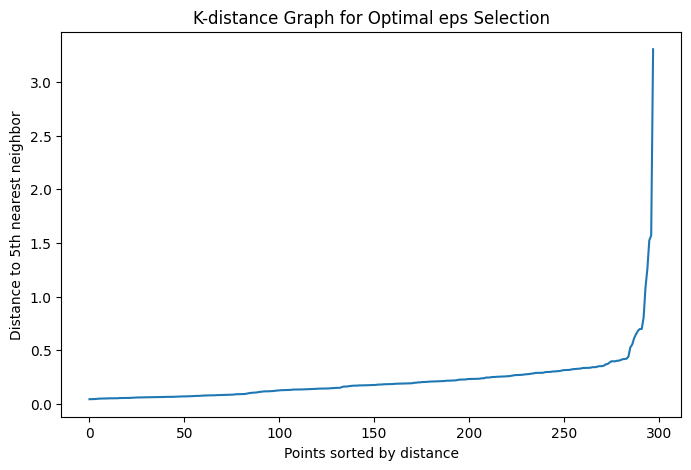

Cluster 0: eps=0.804, best_min_samples=3
3 anomalies detected in Cluster 0.


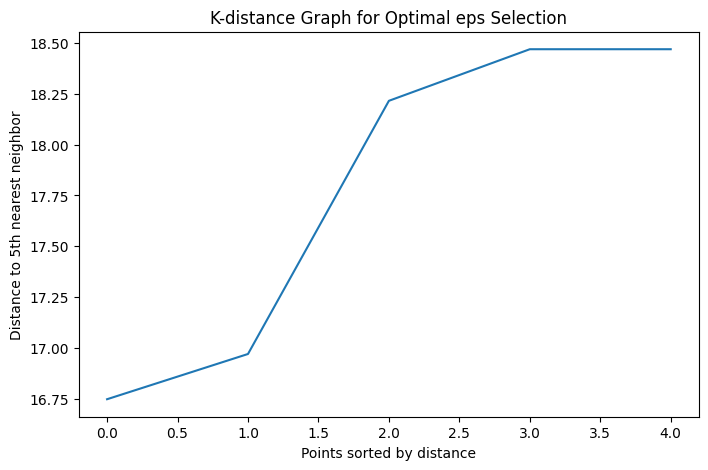

Cluster 1: eps=15.000, best_min_samples=3
1 anomalies detected in Cluster 1.
Skipping small cluster 2


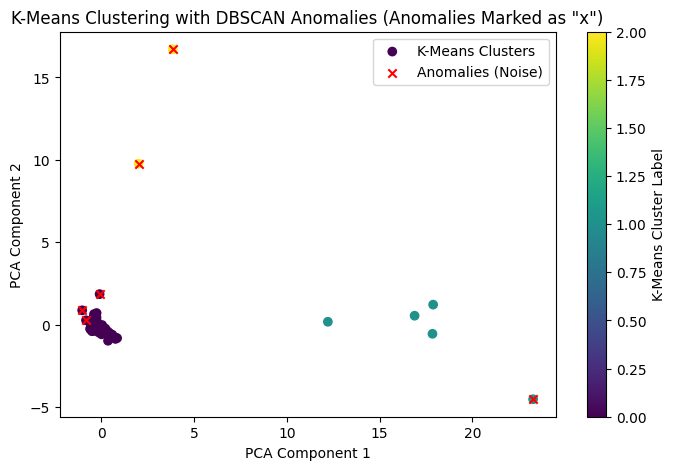

In [22]:
#K MEANS WITH DBSCAN

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Initialize DBSCAN labels for all points
dbscan_labels = np.full(features_scaled.shape[0], -1)

# Allowed list of min_samples values
min_samples_options = [3, 4, 5, 6]

# Function to find optimal eps using k-distance graph
def find_optimal_eps(points, k=5, max_eps=15):
    neighbors = NearestNeighbors(n_neighbors=k).fit(points)
    distances, _ = neighbors.kneighbors(points)
    distances = np.sort(distances[:, k - 1])  # Sort by k-th neighbor distance

    # Plot the k-distance graph
    plt.figure(figsize=(8, 5))
    plt.plot(distances)
    plt.title("K-distance Graph for Optimal eps Selection")
    plt.xlabel("Points sorted by distance")
    plt.ylabel(f"Distance to {k}th nearest neighbor")
    plt.show()

    # Use the 98th percentile distance as a heuristic
    candidate_eps = distances[int(0.98 * len(distances))]
    return np.clip(candidate_eps, 0.05, max_eps)  # Clip eps to a valid range

# Apply DBSCAN to each K-Means cluster individually
for cluster_id in np.unique(clusters):
    cluster_points = features_scaled[clusters == cluster_id]
    point_indices = np.where(clusters == cluster_id)[0]

    if len(cluster_points) < 5:
        print(f"Skipping small cluster {cluster_id}")
        continue

    eps = find_optimal_eps(cluster_points)

    # Select the best min_samples by evaluating silhouette scores
    best_silhouette = 0.5
    best_min_samples = 3
    for min_samples in min_samples_options:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        local_labels = dbscan.fit_predict(cluster_points)

        valid_indices = local_labels != -1
        if np.any(valid_indices) and len(set(local_labels[valid_indices])) > 1:
            silhouette_avg = silhouette_score(cluster_points[valid_indices], local_labels[valid_indices])
            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_min_samples = min_samples

    # Apply DBSCAN using the best min_samples
    dbscan = DBSCAN(eps=eps, min_samples=best_min_samples)
    local_labels = dbscan.fit_predict(cluster_points)
    print(f"Cluster {cluster_id}: eps={eps:.3f}, best_min_samples={best_min_samples}")

    # Assign DBSCAN labels back to the global label array
    for idx, label in zip(point_indices, local_labels):
        dbscan_labels[idx] = label if label != -1 else -1

    # Check if the cluster has anomalies or not
    anomalies_present = np.sum(local_labels == -1)
    if anomalies_present == 0:
        print(f"No anomalies detected in Cluster {cluster_id}.")
    else:
        print(f"{anomalies_present} anomalies detected in Cluster {cluster_id}.")

# Filter out noise points (-1) for silhouette scoring
valid_indices = dbscan_labels != -1
valid_points = features_scaled[valid_indices]
valid_labels = dbscan_labels[valid_indices]

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Separate normal points and anomalies
normal_points = features_pca[dbscan_labels != -1]
normal_labels = dbscan_labels[dbscan_labels != -1]
anomalies = features_pca[dbscan_labels == -1]

# Plot DBSCAN results
plt.figure(figsize=(8,5))

# Plot K-Means clusters with distinct colors
scatter_normal = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap='viridis', marker='o', label='K-Means Clusters')

# Plot anomalies (noise points) as 'x'
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', marker='x', label='Anomalies (Noise)')

plt.title('K-Means Clustering with DBSCAN Anomalies (Anomalies Marked as "x")')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter_normal, label='K-Means Cluster Label')
plt.legend()
plt.show()

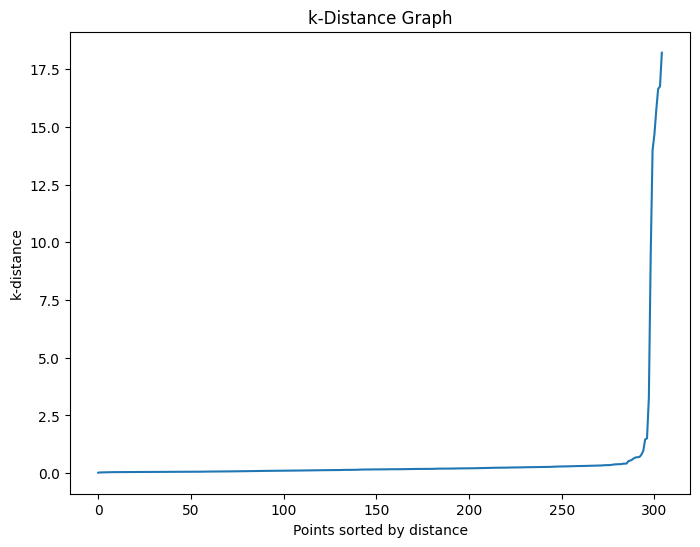

Evaluating eps=0.3, min_samples=3 => Silhouette Score: 0.353
Evaluating eps=0.3, min_samples=4 => Silhouette Score: 0.353
Evaluating eps=0.3, min_samples=5 => Silhouette Score: 0.608
Evaluating eps=0.3, min_samples=6 => Silhouette Score: 0.599
Evaluating eps=0.37777777777777777, min_samples=3 => Silhouette Score: 0.392
Evaluating eps=0.37777777777777777, min_samples=4 => Silhouette Score: 0.392
Evaluating eps=0.37777777777777777, min_samples=5 => Silhouette Score: 0.392
Evaluating eps=0.37777777777777777, min_samples=6 => Silhouette Score: 0.391
Evaluating eps=0.45555555555555555, min_samples=3 => Silhouette Score: 0.355
Evaluating eps=0.45555555555555555, min_samples=4 => Silhouette Score: 0.841
Evaluating eps=0.45555555555555555, min_samples=5 => Silhouette Score: 0.836
Evaluating eps=0.45555555555555555, min_samples=6 => Silhouette Score: 0.836
Evaluating eps=0.5333333333333333, min_samples=3 => Silhouette Score: 0.350
Evaluating eps=0.5333333333333333, min_samples=4 => Silhouette S

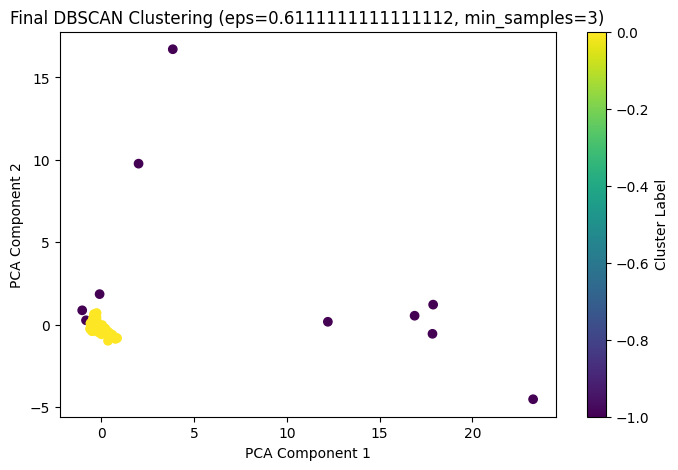

In [23]:
#DBSCAN directly
# Find the best eps for DBSCAN using k-distance graph
def plot_k_distance_graph(features_scaled):
    # Use nearest neighbors to find k-distance
    neighbors = NearestNeighbors(n_neighbors=4)  # You can adjust n_neighbors (min_samples)
    neighbors.fit(features_scaled)
    distances, indices = neighbors.kneighbors(features_scaled)
    distances = np.sort(distances[:, -1], axis=0)  # Sort distances to the 4th nearest neighbor
    plt.figure(figsize=(8, 6))
    plt.plot(distances)
    plt.title('k-Distance Graph')
    plt.xlabel('Points sorted by distance')
    plt.ylabel('k-distance')
    plt.show()

# Plot k-distance graph to visually select eps
plot_k_distance_graph(features_scaled)

# Evaluate DBSCAN with different eps and min_samples values
def evaluate_dbscan(features_scaled, eps_values, min_samples_values):
    best_silhouette = -1
    best_eps = None
    best_min_samples = None
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            # Apply DBSCAN with specific eps and min_samples
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(features_scaled)
            
            # Compute Silhouette Score (skip if all points are noise)
            if len(set(labels)) > 1:  # At least two clusters
                silhouette_avg = silhouette_score(features_scaled, labels)
                if silhouette_avg > best_silhouette:
                    best_silhouette = silhouette_avg
                    best_eps = eps
                    best_min_samples = min_samples
                print(f"Evaluating eps={eps}, min_samples={min_samples} => Silhouette Score: {silhouette_avg:.3f}")
            else:
                print(f"Evaluating eps={eps}, min_samples={min_samples} => No valid clusters (Silhouette Score not computed)")

    print(f"\nBest eps: {best_eps}, Best min_samples: {best_min_samples} => Best Silhouette Score: {best_silhouette:.3f}")
    return best_eps, best_min_samples

# Define ranges for eps and min_samples to test
eps_values = np.linspace(0.3, 1.0, 10)  # Example range for eps
min_samples_values = [3, 4, 5, 6]      # Example values for min_samples

# Evaluate and choose the best eps and min_samples based on silhouette score
best_eps, best_min_samples = evaluate_dbscan(features_scaled, eps_values, min_samples_values)

# Final DBSCAN with the best parameters
dbscan_final = DBSCAN(eps=best_eps, min_samples=best_min_samples)
final_labels = dbscan_final.fit_predict(features_scaled)

# Visualize the final DBSCAN clustering results
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

plt.figure(figsize=(8,5))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=final_labels, cmap='viridis', marker='o', label='Data Points')
plt.title(f'Final DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


Total anomalies from K-Means + DBSCAN: 6
Total anomalies from direct DBSCAN: 10
Number of common anomalies: 6
Indices of common anomalies: {197, 10, 304, 83, 245, 279}


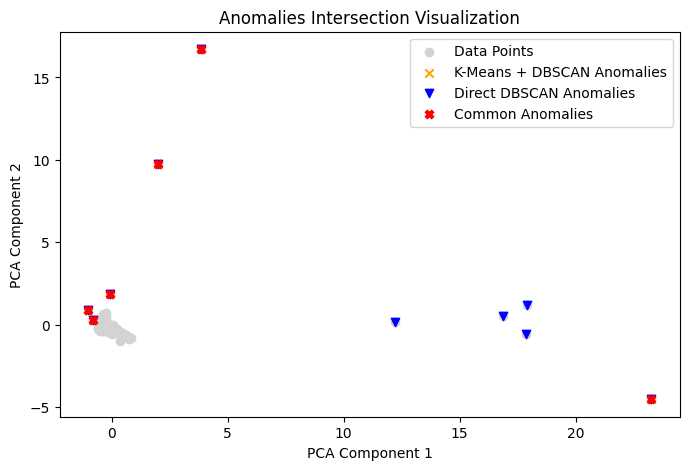

In [24]:
# DBSCAN directly on the full dataset
dbscan_direct = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_direct_labels = dbscan_direct.fit_predict(features_scaled)

# Anomalies from both approaches
kmeans_dbscan_anomalies = set(np.where(dbscan_labels == -1)[0])
direct_dbscan_anomalies = set(np.where(dbscan_direct_labels == -1)[0])

# Intersection of anomalies
common_anomalies = kmeans_dbscan_anomalies.intersection(direct_dbscan_anomalies)

print(f"Total anomalies from K-Means + DBSCAN: {len(kmeans_dbscan_anomalies)}")
print(f"Total anomalies from direct DBSCAN: {len(direct_dbscan_anomalies)}")
print(f"Number of common anomalies: {len(common_anomalies)}")
print("Indices of common anomalies:", common_anomalies)

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Visualization
plt.figure(figsize=(8,5))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c='lightgray', marker='o', label='Data Points')

# Plot anomalies from both approaches
kmeans_dbscan_anomalies_points = features_pca[list(kmeans_dbscan_anomalies)]
direct_dbscan_anomalies_points = features_pca[list(direct_dbscan_anomalies)]

plt.scatter(kmeans_dbscan_anomalies_points[:, 0], kmeans_dbscan_anomalies_points[:, 1],
            color='orange', marker='x', label='K-Means + DBSCAN Anomalies')
plt.scatter(direct_dbscan_anomalies_points[:, 0], direct_dbscan_anomalies_points[:, 1],
            color='blue', marker='v', label='Direct DBSCAN Anomalies')

# Highlight common anomalies
if common_anomalies:
    common_anomalies_points = features_pca[list(common_anomalies)]
    plt.scatter(common_anomalies_points[:, 0], common_anomalies_points[:, 1],
                color='red', marker='X', label='Common Anomalies')

plt.title('Anomalies Intersection Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


